## Lab 4 - Madison Ward

1. Original Webwork Problem
   x + y >= 6 , 4x + y <= 9 , x >= 0 , y >= 0
   The shape of the region is triangle.
2. Corner Points: (0,6), (0,9), (1,5)
3. Graph

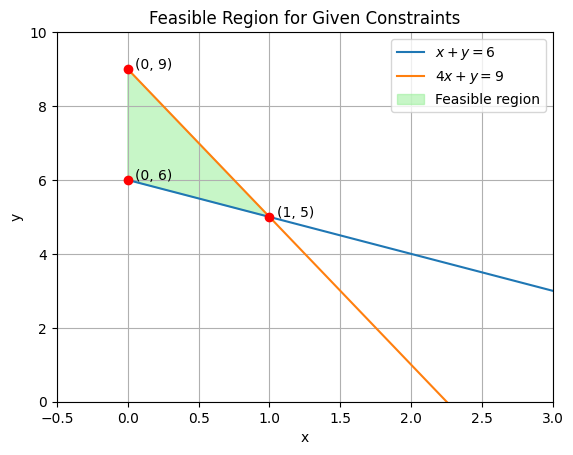

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 3, 400)
y1 = 6 - x       # from x + y = 6
y2 = 9 - 4*x     # from 4x + y = 9

plt.plot(x, y1, label=r'$x + y = 6$')
plt.plot(x, y2, label=r'$4x + y = 9$')
y_region_lower = np.maximum(y1, 0)    # y >= 6 - x
y_region_upper = np.minimum(y2, 9)    # y <= 9 - 4x

feasible_x = [0, 0, 1]
feasible_y = [6, 9, 5]
plt.fill(feasible_x, feasible_y, color='lightgreen', alpha=0.5, label='Feasible region')

vertices = np.array([[0,6],[0,9],[1,5]])
plt.scatter(vertices[:,0], vertices[:,1], color='red', zorder=5)
for (xv, yv) in vertices:
    plt.text(xv + 0.05, yv, f'({xv}, {yv})')

plt.xlim(-0.5, 3)
plt.ylim(0, 10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Feasible Region for Given Constraints')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
import numpy as np
from scipy.optimize import linprog

corners = [(0, 6), (0, 9), (1, 5)]

def P(x, y):
    return 3*x + 2*y

print("Corner Points and Objective Values:")
values = [(x, y, P(x, y)) for x, y in corners]
for x, y, val in values:
    print(f"({x}, {y}) → P = {val}")
    
best = max(values, key=lambda t: t[2])
print(f"\nCorner that maximizes P: ({best[0]}, {best[1]}) with P = {best[2]}")

print("\nSlack/Surplus Variable Form:")
print("x + y ≥ 6   →   x + y - s1 = 6   (s1 ≥ 0, surplus variable)")
print("4x + y ≤ 9   →   4x + y + s2 = 9  (s2 ≥ 0, slack variable)")

c = [-3, -2]
A_ub = [[-1, -1], [4, 1]]
b_ub = [-6, 9]
bounds = [(0, None), (0, None)]

res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')

if res.success:
    print("\nSolver Result (linprog):")
    print(f"Optimal x = {res.x[0]:.4f}, y = {res.x[1]:.4f}")
    print(f"Optimal P = {-res.fun:.4f}")

    print("\nComparison:")
    print(f"Manual corner method → ({best[0]}, {best[1]}) with P = {best[2]}")
    print(f"linprog solver → ({res.x[0]:.4f}, {res.x[1]:.4f}) with P = {-res.fun:.4f}")



Corner Points and Objective Values:
(0, 6) → P = 12
(0, 9) → P = 18
(1, 5) → P = 13

Corner that maximizes P: (0, 9) with P = 18

Slack/Surplus Variable Form:
x + y ≥ 6   →   x + y - s1 = 6   (s1 ≥ 0, surplus variable)
4x + y ≤ 9   →   4x + y + s2 = 9  (s2 ≥ 0, slack variable)

Solver Result (linprog):
Optimal x = 0.0000, y = 9.0000
Optimal P = 18.0000

Comparison:
Manual corner method → (0, 9) with P = 18
linprog solver → (0.0000, 9.0000) with P = 18.0000


4. Find the corner that maximizes P=3x=2y: (0,9) with P=18
6. Comparison: same result 

1. Set 04 Problem 6

Optimal deluxe (x) = 24.00
Optimal standard (y) = 24.00
Maximum revenue = $12,480.00


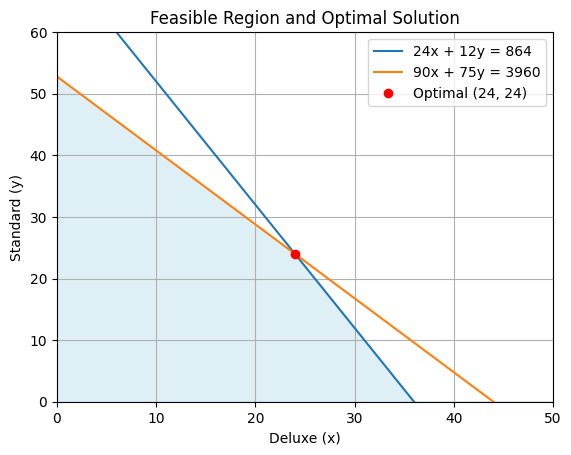

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

c = [-320, -200]

A = [[24, 12], [90, 75]]   # <= constraints
b = [864, 3960]
bounds = [(0, None), (0, None)]

res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')
x, y = res.x
P = -res.fun

print(f"Optimal deluxe (x) = {x:.2f}")
print(f"Optimal standard (y) = {y:.2f}")
print(f"Maximum revenue = ${P:,.2f}")

x_vals = np.linspace(0, 50, 200)
y1 = (864 - 24*x_vals) / 12
y2 = (3960 - 90*x_vals) / 75
plt.plot(x_vals, y1, label="24x + 12y = 864")
plt.plot(x_vals, y2, label="90x + 75y = 3960")
plt.fill_between(x_vals, 0, np.minimum(y1, y2), color='lightblue', alpha=0.4)
plt.plot(x, y, 'ro', label=f'Optimal ({x:.0f}, {y:.0f})')
plt.xlim(0, 50)
plt.ylim(0, 60)
plt.xlabel("Deluxe (x)")
plt.ylabel("Standard (y)")
plt.legend()
plt.title("Feasible Region and Optimal Solution")
plt.grid(True)
plt.show()
